### Intro

5 примеров:
Прогнозирование пользовательских предпочтений (например, кино/музыка) - Регрессия (оценка вероятности интереса) + Классификация (рекомендательная система: предсказание категории контента)
Выбор наилучшего местоположения (например, кафе) - Оптимизация вложений, снижение риска - Кластеризация (анализ плотности клиентов, трафика, группировка по районам) + Снижение размерности (анализ факторов влияния)
Прогнозирование цен фондового рынка - Снижение рисков, возможность точного прогнозирования - Регрессия (предсказание числовых значений цен акций)
Прогнозирование об одобрении кредита - Защита средств от неплатежеспособности клиентов, автоматизация принятия решений - Классификация (одобрить/не одобрить кредит)
Идентификация заболеваний растений - Снижение затрат на ручной осмотр - Классификация (здоровое/больное растение) + Кластеризация (поиск схожих симптомов в больших данных)
Общие преимущества методов МО в этих примерах:  
- Автоматизация замена рутинных задач.  
- Адаптивность обучение на новых данных (например, обновление рекомендаций).  
- Точность снижение человеческих ошибок (в медицине, управлении).  
- Масштабируемость обработка больших объёмов данных (например, миллионы пользователей).  
<br>Прогноз цены на дом - Регрессия<br>Предсказать, вернет ли клиент кредит - Классификация<br>Предсказать, когда пациенту необходимо принять лекарство - Регрессия<br>Выбрать, какое лекарство из имеющихся в наличии следует принять пациенту - Классификация<br>Выбрать сегмент клиентов для промо-коммуникации - Кластеризация<br>Распознавание дефектной продукции на производственной линии (на основе фотосканирования) - Кластеризация<br>Решить, как разместить продукцию на полке в магазине. - Кластеризация<br>Поиск сайтов для ввода текстового запроса. - Классификация<br>Разделите покупателей магазина на сегменты, чтобы понять различия в их поведении. - Кластеризация<br>Обнаружение аномалий в трафике сайта. - Кластеризация<br>Мультикласс — это задача, где каждый объект классифицируется в один класс из нескольких возможных
Классифицикация изображения фруктов - каждый объект может быть отнесён только к одному из этих классов
Мультиметка — это задача, где объект может быть отнесён к нескольким классам одновременно
Классификация фильмов — фильм может быть одновременно комедийным и приключенческим
Является ли пример с ценами на жилье из теории классификацией регрессионной проблемы?
Нет, это задача регрессии
Можно ли свести регрессионную проблему к классификации?
Да, если необходимо классифицировать по диапазонам значений

### Intro DA

In [44]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import lightgbm

In [45]:
dtrain = pd.read_json('../datasets/train.json')
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [90]:
print(dtrain.columns)

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')


In [46]:
dtrain.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [47]:
dtrain_numeric = dtrain.select_dtypes(include=['number'])
dtrain_numeric.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [48]:
empty_cols = dtrain.columns[dtrain.isna().all()].tolist()
empty_cols

[]

15 столбцов,49352 строки<br>целевой столбец-price<br>пустых столбцов нет

In [49]:
df = dtrain[['bathrooms', 'bedrooms', 'interest_level', 'price']].copy()
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


### Statistical DA

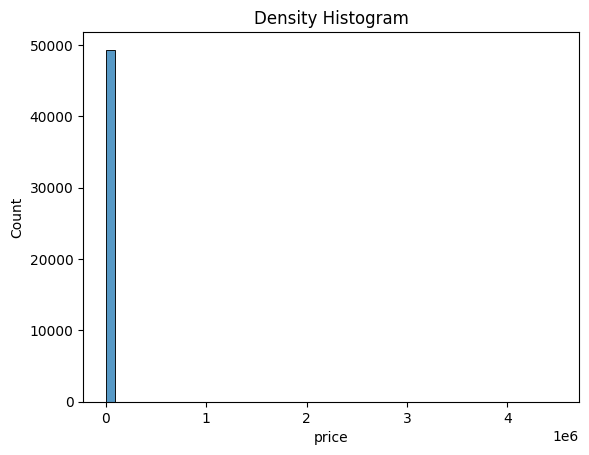

In [50]:
sns.histplot(data=df, x='price', bins=50);
plt.title("Density Histogram");

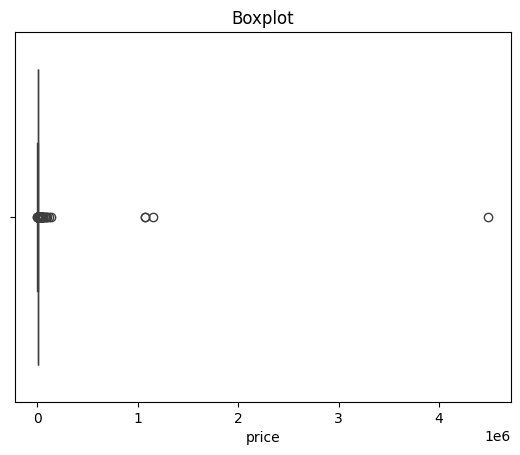

In [51]:
sns.boxplot(data=df, x='price', flierprops={'marker':'o',});
plt.title("Boxplot");

In [52]:
lower_percentile = df['price'].quantile(0.01)
upper_percentile = df['price'].quantile(0.99)
new_df = df[(df['price'] > lower_percentile) & (df['price'] < upper_percentile)]

In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 4 to 124009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48343 non-null  float64
 1   bedrooms        48343 non-null  int64  
 2   interest_level  48343 non-null  object 
 3   price           48343 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


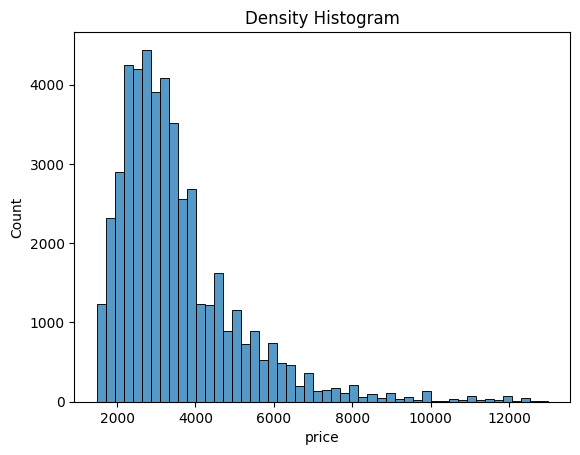

In [54]:
sns.histplot(data=new_df, x='price', bins=50);
plt.title("Density Histogram");

In [55]:
new_df['interest_level'].info()

<class 'pandas.core.series.Series'>
Index: 48343 entries, 4 to 124009
Series name: interest_level
Non-Null Count  Dtype 
--------------  ----- 
48343 non-null  object
dtypes: object(1)
memory usage: 755.4+ KB


In [56]:
new_df.groupby(['interest_level']).count()

,bathrooms,bedrooms,price
interest_level,,,
high,3557,3557,3557
low,33672,33672,33672
medium,11114,11114,11114


In [57]:
new_df.loc[:,'interest_level'] = new_df['interest_level'].replace({'low':0,'medium':1,'high':2})

/tmp/ipykernel_8775/2623655362.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.loc[:,'interest_level'] = new_df['interest_level'].replace({'low':0,'medium':1,'high':2})


In [58]:
new_df['interest_level'].value_counts()

interest_level
0    33672
1    11114
2     3557
Name: count, dtype: int64

In [59]:
new_df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


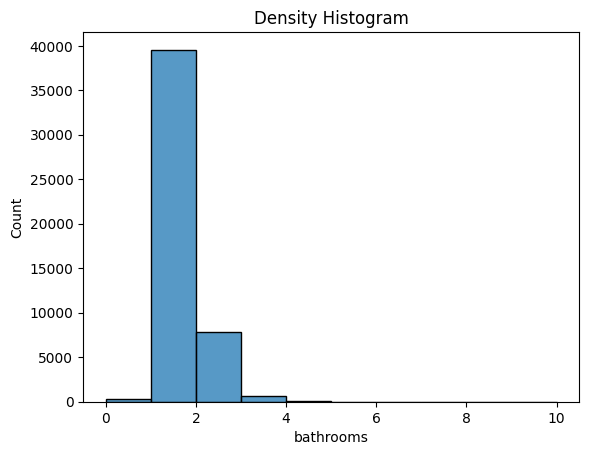

In [60]:
sns.histplot(data=new_df, x='bathrooms', bins=10);
plt.title("Density Histogram");

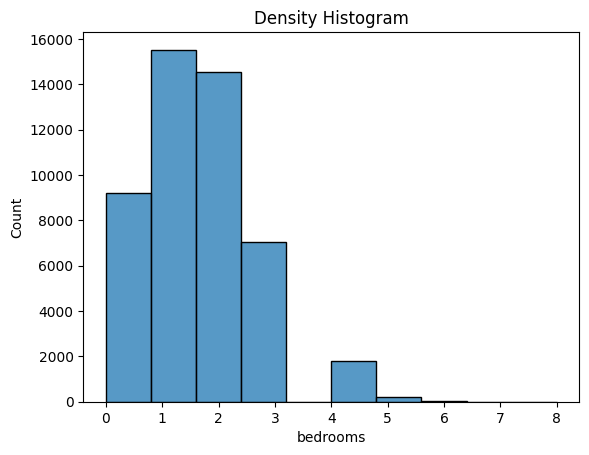

In [61]:
sns.histplot(data=new_df, x='bedrooms', bins=10);
plt.title("Density Histogram");

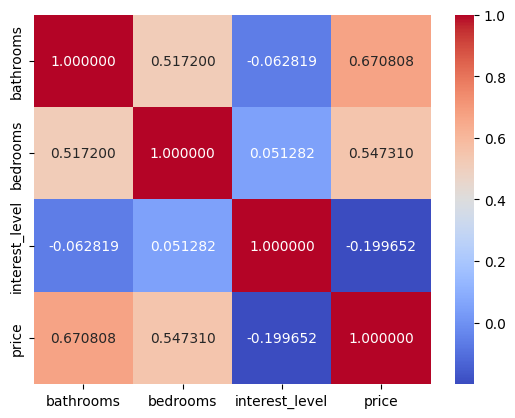

In [94]:
corr = new_df.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt = '.6f')
plt.show()

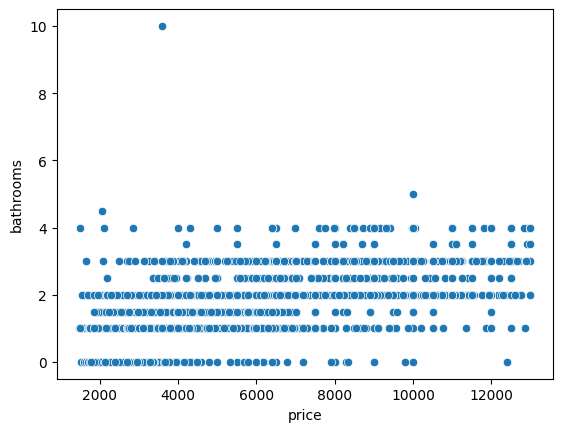

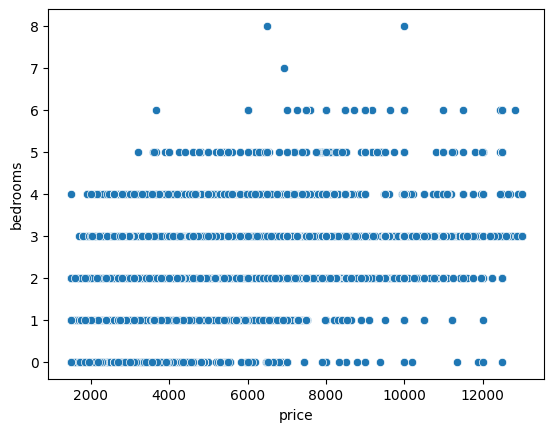

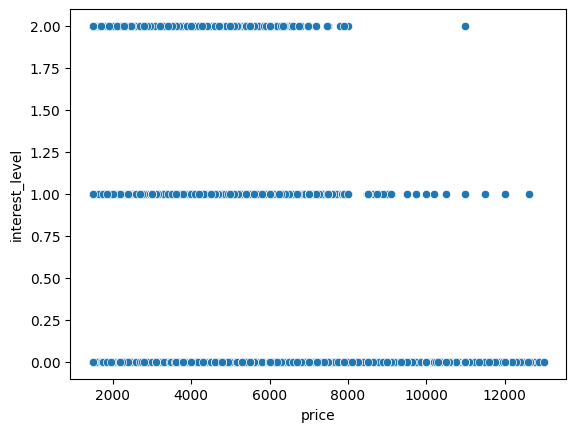

In [63]:
for col in ['bathrooms', 'bedrooms', 'interest_level']:
    sns.scatterplot(data=new_df, x='price', y=col)
    plt.show()

### Functions

In [64]:
sq_df = new_df.assign(
    bathrooms_sq = new_df['bathrooms']**2,
    bedrooms_sq = new_df['bedrooms']**2,
    interest_sq = new_df['interest_level'].astype('int')**2
)

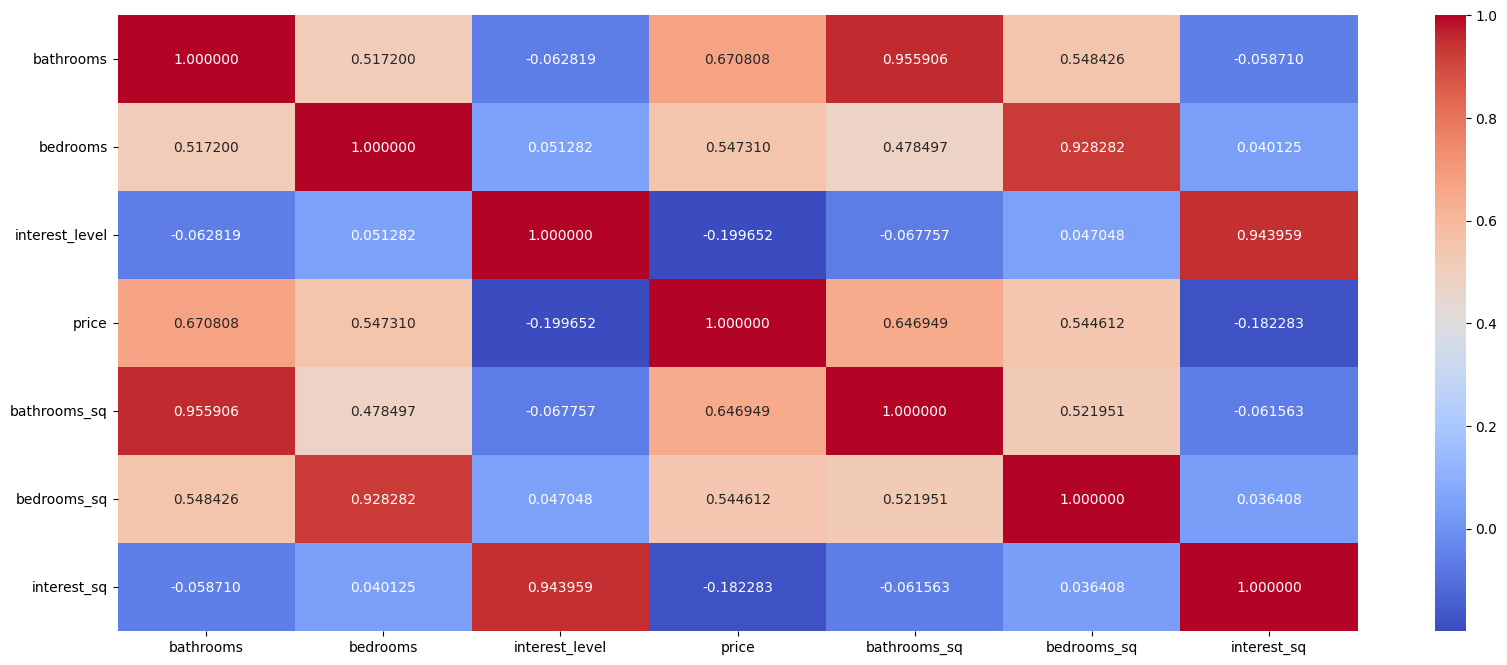

In [95]:
corr = sq_df.corr(method='pearson')
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt = '.6f')
plt.show()

In [66]:
mdf = new_df[['bathrooms', 'bedrooms', 'price']]
mdf.head()

,bathrooms,bedrooms,price
4,1.0,1,2400
6,1.0,2,3800
9,1.0,2,3495
10,1.5,3,3000
15,1.0,0,2795


### Model

In [83]:
tdf = pd.read_json('../datasets/test.json')
tdf = tdf[['bathrooms', 'bedrooms', 'price']]
lower_percentile = tdf['bathrooms'].quantile(0.01)
upper_percentile = tdf['bathrooms'].quantile(0.99)
tdf = tdf[(tdf['bathrooms'] > lower_percentile) & (tdf['bathrooms'] < upper_percentile)]
lower_percentile = tdf['price'].quantile(0.01)
upper_percentile = tdf['price'].quantile(0.99)
tdf = tdf[(tdf['price'] > lower_percentile) & (tdf['price'] < upper_percentile)]
lower_percentile = tdf['bedrooms'].quantile(0.01)
upper_percentile = tdf['bedrooms'].quantile(0.99)
tdf = tdf[(tdf['bedrooms'] > lower_percentile) & (tdf['bedrooms'] < upper_percentile)]

In [84]:
X_train = mdf[['bathrooms', 'bedrooms']]
y_train = mdf['price']
X_test = tdf[['bathrooms', 'bedrooms']]
y_test = tdf['price']
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [85]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

In [86]:
pd.set_option('future.no_silent_downcasting', True)
linear = LinearRegression()
tree = DecisionTreeRegressor(random_state=21)

models = {'linear_regression': linear, 'decision_tree': tree}

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    mae_row = pd.DataFrame({'model': [name], 'train': [mae_train], 'test': [mae_test]})
    rmse_row = pd.DataFrame({'model': [name], 'train': [rmse_train], 'test': [rmse_test]})
    
    result_MAE = pd.concat([result_MAE, mae_row], ignore_index=True)
    result_RMSE = pd.concat([result_RMSE, rmse_row], ignore_index=True)

/tmp/ipykernel_8775/4131120697.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([result_MAE, mae_row], ignore_index=True)
/tmp/ipykernel_8775/4131120697.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([result_RMSE, rmse_row], ignore_index=True)


In [87]:
mean_price = np.mean(y_train)
median_price = np.median(y_train)

native = {'native_mean': mean_price, 'native_median': median_price}

for name, native in native.items():
    y_train_pred = np.full_like(y_train, native)
    y_test_pred = np.full_like(y_test, native)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    mae_row = pd.DataFrame({'model': [name], 'train': [mae_train], 'test': [mae_test]})
    rmse_row = pd.DataFrame({'model': [name], 'train': [rmse_train], 'test': [rmse_test]})
    
    result_MAE = pd.concat([result_MAE, mae_row], ignore_index=True)
    result_RMSE = pd.concat([result_RMSE, rmse_row], ignore_index=True)

In [88]:
result_MAE

,model,train,test
0,linear_regression,753.679394,1189.938679
1,decision_tree,753.675997,1190.371892
2,native_mean,1134.316695,1984.894350
3,native_median,1082.220859,2300.712009


In [89]:
result_RMSE

,model,train,test
0,linear_regression,1070.669027,1626.079412
1,decision_tree,1070.598967,1626.754782
2,native_mean,1585.609108,2530.392294
3,native_median,1631.719953,2825.079774
